#                       CononaVirus Analysis & Prediction  ｡✴｡ 💯


In [2]:
import numpy as np
import matplotlib as mp
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

In [3]:
# Libraries and dependencies 
import os #provides functions for interacting with the operating system

import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from datetime import datetime

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

In [4]:
# Loading the cumulative raw data
# read files with the help of pandas library
raw_data_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
raw_data_deaths = pd.read_csv('time_series_covid19_deaths_global.csv')
raw_data_Recovered = pd.read_csv('time_series_covid19_recovered_global.csv')

print("The Shape of Cornirmed is: ", raw_data_confirmed.shape)
print("The Shape of Cornirmed is: ", raw_data_deaths.shape)
print("The Shape of Cornirmed is: ", raw_data_Recovered.shape)

raw_data_confirmed.head(10)

The Shape of Cornirmed is:  (264, 101)
The Shape of Cornirmed is:  (264, 101)
The Shape of Cornirmed is:  (250, 101)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,933,996,1026,1092,1176,1279,1351,1463,1531,1703
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,548,562,584,609,634,663,678,712,726,736
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,704,713,717,717,723,723,731,738,738,743
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,24,24,24,25,25,25,25,26,27
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,23,23,23,23,24,24,24,24,24,24
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,...,2758,2839,2941,3031,3144,3435,3607,3780,3892,4003
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,...,1248,1291,1339,1401,1473,1523,1596,1677,1746,1808
8,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,103,103,104,104,104,104,105,106,106,106
9,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,2936,2957,2963,2969,2971,2976,2982,2994,3002,3004


In [5]:
raw_data_confirmed_US = pd.read_csv('time_series_covid19_confirmed_US.csv')
raw_data_death_US = pd.read_csv('time_series_covid19_deaths_US.csv')

# Creating a Complete date list
column_dates = raw_data_confirmed_US.columns
column_dates = column_dates.drop(labels=['UID','iso2','iso3','code3','FIPS','Admin2','Combined_Key','Province_State','Country_Region','Lat','Long_'])
# Deleting the column which we don't need
raw_data_confirmed_US.drop(['UID','iso2','iso3','code3','FIPS','Admin2','Combined_Key'],axis=1 ,inplace=True)
raw_data_death_US.drop(['UID','iso2','iso3','code3','FIPS','Admin2','Combined_Key'],axis=1 ,inplace=True)
#averaging long anf lat
lat_long_avg = raw_data_confirmed_US.groupby(['Province_State','Country_Region'],as_index=False).agg({'Lat':'median', 'Long_':'median'})
lat_long_avg.head()
#sumup the values
raw_data_confirmed_US = raw_data_confirmed_US.groupby(['Province_State','Country_Region'],as_index = False)[column_dates].sum()
raw_data_death_US = raw_data_death_US.groupby(['Province_State','Country_Region'],as_index = False)[column_dates].sum()

# left join long and lat
raw_data_confirmed_US = raw_data_confirmed_US.merge(lat_long_avg , how='left' , left_on=['Province_State','Country_Region'] , right_on=['Province_State','Country_Region'])
raw_data_death_US = raw_data_death_US.merge(lat_long_avg , how='left' , left_on=['Province_State','Country_Region'] , right_on=['Province_State','Country_Region'])

# renaming the columns
raw_data_confirmed_US = raw_data_confirmed_US.rename(columns={'Province_State':'Province/State','Country_Region':'Country/Region','Long_':'Long'})
raw_data_death_US = raw_data_death_US.rename(columns={'Province_State':'Province/State','Country_Region':'Country/Region','Long_':'Long'})

# reodering the columns
raw_data_confirmed_US = raw_data_confirmed_US[raw_data_confirmed_US.columns]
raw_data_death_US = raw_data_death_US[raw_data_death_US.columns]
raw_data_confirmed_US.head()



,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,Lat,Long
0,Alabama,US,0,0,0,0,0,0,0,0,...,5079,5317,5593,5832,6026,6026,6421,6539,32.850441,-86.651584
1,Alaska,US,0,0,0,0,0,0,0,0,...,321,329,335,337,339,339,340,345,59.561500,-146.569266
2,American Samoa,US,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-14.271000,-170.132000
3,Arizona,US,0,0,0,0,1,1,1,1,...,5068,5256,5473,5772,6045,6286,6534,6725,33.214988,-110.847909
4,Arkansas,US,0,0,0,0,0,0,0,0,...,1973,1990,2276,2599,2810,2911,3001,3069,34.945915,-92.423206


In [6]:
raw_data_confirmed = raw_data_confirmed[raw_data_confirmed['Country/Region'] != 'US']
raw_data_deaths = raw_data_deaths[raw_data_deaths['Country/Region'] != 'US']
raw_data_confirmed

raw_data_confirmed = pd.concat([raw_data_confirmed , raw_data_confirmed_US], ignore_index=True)
raw_data_deaths = pd.concat([raw_data_deaths , raw_data_death_US], ignore_index=True)
raw_data_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,30,33,36,36,40,42,43,47,50,57
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,26,26,26,26,27,27,27,27,28,28
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,367,375,384,392,402,407,415,419,425,432
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,35,36,37,37,37,37,40,40,40,40
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,Virginia,US,37.373732,-78.158270,0,0,0,0,0,0,...,258,277,300,324,349,373,411,437,449,460
317,Washington,US,47.125212,-120.738013,0,0,0,0,0,0,...,613,636,643,664,686,711,722,737,749,764
318,West Virginia,US,38.843154,-80.665911,0,0,0,0,0,0,...,16,18,24,26,27,31,32,32,34,34
319,Wisconsin,US,44.397070,-89.560937,0,0,0,0,0,0,...,212,220,230,244,248,258,263,266,272,281


In [7]:
raw_data_Recovered[raw_data_Recovered['Country/Region'] == 'US'] # printing US data
print(raw_data_deaths[raw_data_deaths['Country/Region'] == 'US']) # Printing Deaths in US

               Province/State Country/Region        Lat        Long  1/22/20  \
263                   Alabama             US  32.850441  -86.651584        0   
264                    Alaska             US  59.561500 -146.569266        0   
265            American Samoa             US -14.271000 -170.132000        0   
266                   Arizona             US  33.214988 -110.847909        0   
267                  Arkansas             US  34.945915  -92.423206        0   
268                California             US  37.982717 -120.801126        0   
269                  Colorado             US  38.871899 -105.433811        0   
270               Connecticut             US  41.474231  -72.433998        0   
271                  Delaware             US  38.661438  -75.390313        0   
272          Diamond Princess             US   0.000000    0.000000        0   
273      District of Columbia             US   0.000000    0.000000        0   
274                   Florida           

In [8]:
# Un-Pivoting the data
# melt means combing the datasets 
raw_data_confirmed2 = pd.melt(raw_data_confirmed, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name=['Date'])
raw_data_deaths2 = pd.melt(raw_data_deaths, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name=['Date'])
raw_data_Recovered2 = pd.melt(raw_data_Recovered, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name=['Date'])


print("The Shape of Cornirmed is: ", raw_data_confirmed2.shape)
print("The Shape of Cornirmed is: ", raw_data_deaths2.shape)
print("The Shape of Cornirmed is: ", raw_data_Recovered2.shape)


raw_data_confirmed2.tail()

raw_data_confirmed2.head()

The Shape of Cornirmed is:  (31137, 6)
The Shape of Cornirmed is:  (31137, 6)
The Shape of Cornirmed is:  (24250, 6)


,Province/State,Country/Region,Lat,Long,Date,value
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [9]:
# Converting the new column to dates
# it is a way to convert into standard format date.
raw_data_confirmed2['Date'] = pd.to_datetime(raw_data_confirmed2['Date'])
raw_data_deaths2['Date'] = pd.to_datetime(raw_data_deaths2['Date'])
raw_data_Recovered2['Date'] = pd.to_datetime(raw_data_Recovered2['Date'])
raw_data_confirmed2.head()

,Province/State,Country/Region,Lat,Long,Date,value
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0


# 💥 Cleaning The Data 💥

In [10]:
# Investigating the NULL values
# Cleaning the values because we have alot of NULL values
raw_data_Recovered2.isnull().sum()

Province/State    17751
Country/Region        0
Lat                   0
Long                  0
Date                  0
value                 0
dtype: int64

In [11]:
# Renaming the Values!!!
# we are remaining the value to confirmed!!!
raw_data_confirmed2.columns = raw_data_confirmed2.columns.str.replace('value', 'Confirmed')
raw_data_deaths2.columns = raw_data_deaths2.columns.str.replace('value', 'Deaths')
raw_data_Recovered2.columns = raw_data_Recovered2.columns.str.replace('value', 'Recovered')
raw_data_confirmed2.head()
raw_data_Recovered2.head()
raw_data_deaths2.head()

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0


In [12]:
# Dealing with NULL values
#As you know, inplace=True returns None and inplace=False returns a copy of the object with the operation performed.
raw_data_confirmed2['Province/State'].fillna(raw_data_confirmed2['Country/Region'], inplace=True)
raw_data_deaths2['Province/State'].fillna(raw_data_deaths2['Country/Region'], inplace=True)
raw_data_Recovered2['Province/State'].fillna(raw_data_Recovered2['Country/Region'], inplace=True)
    
raw_data_confirmed2.isnull().sum()
raw_data_confirmed2.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,Afghanistan,Afghanistan,33.0000,65.0000,2020-01-22,0
1,Albania,Albania,41.1533,20.1683,2020-01-22,0
2,Algeria,Algeria,28.0339,1.6596,2020-01-22,0
3,Andorra,Andorra,42.5063,1.5218,2020-01-22,0
4,Angola,Angola,-11.2027,17.8739,2020-01-22,0


In [13]:
# printing shapes before the join
print("The Shape of Cornirmed is: ", raw_data_confirmed2.shape)
print("The Shape of deaths is: ", raw_data_deaths2.shape)
print("The Shape of Recovered is: ", raw_data_Recovered2.shape)
# it is printing the number of Raws, Columns because when we need to join rows must be same 

The Shape of Cornirmed is:  (31137, 6)
The Shape of deaths is:  (31137, 6)
The Shape of Recovered is:  (24250, 6)


In [14]:
# Double Check the Null Values In The DataSets
# Hence There is no NULL Values Found !!!!!! <3
raw_data_confirmed2.isnull().sum()
raw_data_deaths2.isnull().sum()
raw_data_Recovered2.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Recovered         0
dtype: int64

# 💥 Joining The Datasets To Make Proper Columns 💥

In [15]:
# Using Full Joing to Combine Columns of Confirmed Cases, Deaths, Recovered Cases!!!

# Confirmed with Deaths
full_join = raw_data_confirmed2.merge(raw_data_deaths2[['Province/State','Country/Region','Date','Deaths']], 
                                      how = 'left', 
                                      left_on = ['Province/State','Country/Region','Date'], 
                                      right_on = ['Province/State', 'Country/Region','Date'])

print("Shape of first join: ", full_join.shape)

# full join with Recovered
full_join = full_join.merge(raw_data_Recovered2[['Province/State','Country/Region','Date','Recovered']], 
                                      how = 'left', 
                                      left_on = ['Province/State','Country/Region','Date'], 
                                      right_on = ['Province/State', 'Country/Region','Date'])

print("Shape of second join: ", full_join.shape)

full_join.head()

Shape of first join:  (31137, 7)
Shape of second join:  (31137, 8)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Afghanistan,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0.0
1,Albania,Albania,41.1533,20.1683,2020-01-22,0,0,0.0
2,Algeria,Algeria,28.0339,1.6596,2020-01-22,0,0,0.0
3,Andorra,Andorra,42.5063,1.5218,2020-01-22,0,0,0.0
4,Angola,Angola,-11.2027,17.8739,2020-01-22,0,0,0.0


In [16]:
# Adding Month and Year as a new Column
# I added New Column of Month_Year because It will use in POWER BI MODEL
full_join['Month-Year'] = full_join['Date'].dt.strftime('%b-%Y')
full_join.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year
0,Afghanistan,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0.0,Jan-2020
1,Albania,Albania,41.1533,20.1683,2020-01-22,0,0,0.0,Jan-2020
2,Algeria,Algeria,28.0339,1.6596,2020-01-22,0,0,0.0,Jan-2020
3,Andorra,Andorra,42.5063,1.5218,2020-01-22,0,0,0.0,Jan-2020
4,Angola,Angola,-11.2027,17.8739,2020-01-22,0,0,0.0,Jan-2020


In [17]:
# We have Cumulative Confirmed cased But I Need Cased Per Days
#                          This is just a TEST to check working for particular province
# filtering data to Anhui to give you an example

#creating a new df, creating a new object 
test = full_join[full_join['Province/State'] == 'Anhui']

#creating a new df, making a copy
full_join2 = test.copy()

#creating a new date columns - 1
full_join2['Date - 1'] = full_join2['Date'] + pd.Timedelta(days=1) # adding DAY + 1
full_join2.rename(columns={'Confirmed': 'Confirmed - 1', 'Deaths': 'Deaths - 1', 'Recovered': 'Recovered - 1',
                          'Date': 'Date Minus 1'}, inplace=True)

# merging Two Different DataSets
full_join3 = test.merge(full_join2[['Province/State', 'Country/Region','Confirmed - 1', 'Deaths - 1', 
                            'Recovered - 1', 'Date - 1', 'Date Minus 1']], how = 'outer',
                             left_on = ['Province/State','Country/Region','Date'], 
                             right_on = ['Province/State', 'Country/Region','Date - 1'])

# Gettting Result Per Day
full_join3['Confirmed Daily'] = full_join3['Confirmed'] - full_join3['Confirmed - 1']


test.head() 
full_join3.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed - 1,Deaths - 1,Recovered - 1,Date - 1,Date Minus 1,Confirmed Daily
0,Anhui,China,31.8257,117.2264,2020-01-22,1.0,0.0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN
1,Anhui,China,31.8257,117.2264,2020-01-23,9.0,0.0,0.0,Jan-2020,1.0,0.0,0.0,2020-01-23,2020-01-22,8.0
2,Anhui,China,31.8257,117.2264,2020-01-24,15.0,0.0,0.0,Jan-2020,9.0,0.0,0.0,2020-01-24,2020-01-23,6.0
3,Anhui,China,31.8257,117.2264,2020-01-25,39.0,0.0,0.0,Jan-2020,15.0,0.0,0.0,2020-01-25,2020-01-24,24.0
4,Anhui,China,31.8257,117.2264,2020-01-26,60.0,0.0,0.0,Jan-2020,39.0,0.0,0.0,2020-01-26,2020-01-25,21.0


In [18]:
# Full Join Contains The Actual Data without another dataset merged
# Full Join2 is just a temporaray Copy to make changes needed for columns
# FUll Join3 is Merged Datasets
# again creating a copy, this is done because we need to add second clean datset to the full join
full_join2 = full_join.copy() 

#creating a new date columns - 1
full_join2['Date - 1'] = full_join2['Date'] + pd.Timedelta(days=1)
full_join2.rename(columns={'Confirmed': 'Confirmed - 1', 'Deaths': 'Deaths - 1', 'Recovered': 'Recovered - 1',
                          'Date': 'Date Minus 1'}, inplace=True)

#Joing on the 2 DFs
full_join3 = full_join.merge(full_join2[['Province/State', 'Country/Region','Confirmed - 1', 'Deaths - 1', 
                            'Recovered - 1', 'Date - 1', 'Date Minus 1']], how = 'left',
                             left_on = ['Province/State','Country/Region','Date'], 
                             right_on = ['Province/State', 'Country/Region','Date - 1'])


full_join3.head()

# Perfrom calculation and get the results
full_join3['Confirmed Daily'] = full_join3['Confirmed'] - full_join3['Confirmed - 1']
full_join3['Deaths Daily'] = full_join3['Deaths'] - full_join3['Deaths - 1']
full_join3['Recovered Daily'] = full_join3['Recovered'] - full_join3['Recovered - 1']

print(full_join3.shape) # print rows, columns
full_join3.head()


(31137, 17)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed - 1,Deaths - 1,Recovered - 1,Date - 1,Date Minus 1,Confirmed Daily,Deaths Daily,Recovered Daily
0,Afghanistan,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
1,Albania,Albania,41.1533,20.1683,2020-01-22,0,0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
2,Algeria,Algeria,28.0339,1.6596,2020-01-22,0,0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
3,Andorra,Andorra,42.5063,1.5218,2020-01-22,0,0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN
4,Angola,Angola,-11.2027,17.8739,2020-01-22,0,0,0.0,Jan-2020,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN


In [19]:
# this is just done to start the data from somewhere.
full_join3['Confirmed Daily'].loc[full_join3['Date'] == '2020-01-22'] = full_join3['Confirmed']
full_join3['Deaths Daily'].loc[full_join3['Date'] == '2020-01-22'] = full_join3['Deaths']
full_join3['Recovered Daily'].loc[full_join3['Date'] == '2020-01-22'] = full_join3['Recovered']
# deleting columns which is not in datasets
del full_join3['Confirmed - 1']
del full_join3['Deaths - 1']
del full_join3['Recovered - 1']
del full_join3['Date - 1']
del full_join3['Date Minus 1']
full_join3.head()

/home/musab/.local/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed Daily,Deaths Daily,Recovered Daily
0,Afghanistan,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0
1,Albania,Albania,41.1533,20.1683,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0
2,Algeria,Algeria,28.0339,1.6596,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0
3,Andorra,Andorra,42.5063,1.5218,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0
4,Angola,Angola,-11.2027,17.8739,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0


In [20]:
full_join3.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed Daily,Deaths Daily,Recovered Daily
31132,Virginia,US,37.373732,-78.158270,2020-04-27,13538,460,NaN,Apr-2020,568.0,11.0,NaN
31133,Washington,US,47.125212,-120.738013,2020-04-27,13686,764,NaN,Apr-2020,165.0,15.0,NaN
31134,West Virginia,US,38.843154,-80.665911,2020-04-27,1063,34,NaN,Apr-2020,8.0,0.0,NaN
31135,Wisconsin,US,44.397070,-89.560937,2020-04-27,6081,281,NaN,Apr-2020,169.0,9.0,NaN
31136,Wyoming,US,42.972723,-106.797885,2020-04-27,520,7,NaN,Apr-2020,18.0,0.0,NaN


In [21]:
# Creating additional slicer for easy of use
# Last column is made for POWER BI
full_join3['Hubei Vs Rest of the World'] = 'Rest of the World'
full_join3['Hubei Vs Rest of the World'].loc[full_join3['Province/State'] == 'Hubei'] = 'Hubei - Virus birth'


/home/musab/.local/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
# Complete DataSet Print
full_join3.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed Daily,Deaths Daily,Recovered Daily,Hubei Vs Rest of the World
31132,Virginia,US,37.373732,-78.158270,2020-04-27,13538,460,NaN,Apr-2020,568.0,11.0,NaN,Rest of the World
31133,Washington,US,47.125212,-120.738013,2020-04-27,13686,764,NaN,Apr-2020,165.0,15.0,NaN,Rest of the World
31134,West Virginia,US,38.843154,-80.665911,2020-04-27,1063,34,NaN,Apr-2020,8.0,0.0,NaN,Rest of the World
31135,Wisconsin,US,44.397070,-89.560937,2020-04-27,6081,281,NaN,Apr-2020,169.0,9.0,NaN,Rest of the World
31136,Wyoming,US,42.972723,-106.797885,2020-04-27,520,7,NaN,Apr-2020,18.0,0.0,NaN,Rest of the World


# 💥 Extracting The DataSets in CSV 💥

In [23]:
# Setting my path
path = "temp"
# Changing my CWD
#os.chdir(path)
full_join3.to_csv('Complete_Report_final_Part_1.csv', sep='\t')

In [24]:
full_join3
data_test = full_join3.copy()
data_test
full_join3.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed Daily,Deaths Daily,Recovered Daily,Hubei Vs Rest of the World
0,Afghanistan,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World
1,Albania,Albania,41.1533,20.1683,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World
2,Algeria,Algeria,28.0339,1.6596,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World
3,Andorra,Andorra,42.5063,1.5218,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World
4,Angola,Angola,-11.2027,17.8739,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World
5,Antigua and Barbuda,Antigua and Barbuda,17.0608,-61.7964,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World
6,Argentina,Argentina,-38.4161,-63.6167,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World
7,Armenia,Armenia,40.0691,45.0382,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World
8,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World


# 💥 A New Column Will Be Created For Horizontal bar Chart For Animated Representation 💥

In [132]:
# Carry Out the Uniques values from the dates to make sure that not a smiliar dates will repeat.
dates = full_join3['Date'].unique()

print(full_join3.shape)
dates

try:
    del concat_data
except:
    print()
    
try:
    del final_concat_data
except:
    print()
    

for i in dates:
    new_data = full_join3[full_join3['Date'] == i]
    new_data['Cumulative Date'] = i
    print(i)
    
    try:     
        concat_data = pd.concat([concat_data, new_data], ignore_index = True)
        concat_data['Cumulative Date 2'] = i
        print(concat_data['Date'].unique())
        
        try:
            final_concat_data = pd.concat([final_concat_data, concat_data], ignore_index = True)
        except:
            final_concat_data = concat_data

    except:
        concat_data = new_data
        
print(final_concat_data.shape)
final_concat_data.head()


(31137, 13)


2020-01-22T00:00:00.000000000
2020-01-23T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000']
2020-01-24T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000']
2020-01-25T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000']
2020-01-26T00:00:00.000000000


/home/musab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000']
2020-01-27T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000']
2020-01-28T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000']
2020-01-29T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000']
2020-01-30T00:00:00.000000000
['2020-01-22T00:00:00.00000000

2020-02-13T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000']
2020-02-14T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.0000000

['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000000'
 '2020-02-21T00:00:00.000

2020-03-02T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-03-08T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-03-14T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-03-19T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-03-25T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-03-29T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-04-02T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-04-06T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-04-10T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-04-14T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-04-17T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-04-20T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-04-23T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

2020-04-26T00:00:00.000000000
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00:00.000000000' '2020-02-14T00:00:00.000000000'
 '2020-02-15T00:00:00.000000000' '2020-02-16T00:00:00.000000000'
 '2020-02-17T00:00:00.000000000' '2020-02-18T00:00:00.000000000'
 '2020-02-19T00:00:00.000000000' '2020-02-20T00:00:00.000000

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed Daily,Deaths Daily,Recovered Daily,Hubei Vs Rest of the World,Cumulative Date,Cumulative Date 2
0,Afghanistan,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World,2020-01-22,2020-01-23
1,Albania,Albania,41.1533,20.1683,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World,2020-01-22,2020-01-23
2,Algeria,Algeria,28.0339,1.6596,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World,2020-01-22,2020-01-23
3,Andorra,Andorra,42.5063,1.5218,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World,2020-01-22,2020-01-23
4,Angola,Angola,-11.2027,17.8739,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0,Rest of the World,2020-01-22,2020-01-23


In [133]:
# Create New Datasets in CSV
path = "temp"
# Changing my CWD
#os.chdir(path)
final_concat_data.to_csv('Complete Report2', sep='\t')

In [101]:
final_concat_data.shape


(1254528, 15)

# Prediction Analysis

In [45]:
calender = pd.read_csv('Calendar.csv')
calender['Date'] = pd.to_datetime(calender['Date'] , dayfirst=True)
final_join4 = full_join3.merge(calender,how='left',left_on='Date',right_on='Date')
calender
final_join4
calender

,Date,Date_id,Month_No,Month_ID,Month_Name,Quarter
0,2020-01-01,1,1,1,January,2020 - Q1
1,2020-01-02,2,1,1,January,2020 - Q1
2,2020-01-03,3,1,1,January,2020 - Q1
3,2020-01-04,4,1,1,January,2020 - Q1
4,2020-01-05,5,1,1,January,2020 - Q1
...,...,...,...,...,...,...
361,2020-12-27,362,12,12,December,2020 - Q4
362,2020-12-28,363,12,12,December,2020 - Q4
363,2020-12-29,364,12,12,December,2020 - Q4
364,2020-12-30,365,12,12,December,2020 - Q4


In [44]:
counter = final_join4[final_join4['Month-Year'] == 'Mar-2020'] #(8184, 16)
counter = final_join4[final_join4['Month-Year'] == 'Apr-2020']
counter.shape


(8667, 17)

In [42]:
hubei = final_join4[final_join4['Province/State'] == 'Hubei']
peak = hubei['Confirmed Daily'].max()
peak_date_id = hubei['Date_id'][hubei['Confirmed Daily'] == peak]
peak_date_id # this is an ID of maximum cases in hubei
dataset_after_peak = hubei[hubei['Date_id'] >= peak_date_id.max()] # after peak
dataset_after_peak
ending_day = dataset_after_peak[dataset_after_peak['Confirmed Daily'] > 1]
ending_date_id  =   ending_day[ending_day['Date_id'] == ending_day['Date_id'].max()] # maximun ID must be in the end that's why we took it
ending_date_id
ending_day_date = ending_date_id['Date'] + pd.DateOffset(1)
ending_day_date
ending_day = dataset_after_peak[dataset_after_peak['Date'] == ending_day_date.max()] 
ending_date_id = ending_day['Date_id']
ending_date_id
peak
peak_date_id.max()
ending_day['Date_id'].max()
ending_date_id.max()
ending_date_id

27989    109
Name: Date_id, dtype: int64

In [38]:
temp = calender['Date'][calender['Date_id'] == 109]
temp

108   2020-04-18
Name: Date, dtype: datetime64[ns]

In [63]:
# how long it took to hit zero, this is hubei result
date_to_zero = ending_date_id.max() - peak_date_id.max()
date_to_zero
days_to_reach_peak = peak_date_id.max() - 1
days_to_reach_peak

date_to_zero
days_to_reach_peak

43

In [64]:
states = final_join4['Province/State'][final_join4['Confirmed']>20].unique()
#states = ['Hubei']

try:
    del final_df
except:
    print("doneee")
    
for i in states:
    dataset_states = final_join4[final_join4['Province/State'] == i]
    #print(i)
    
    # calculate maximum peak
    peak = dataset_states['Confirmed Daily'].max()
    #print(peak)
    
    # calculating date id
    peak_date_id = dataset_states['Date_id'][dataset_states['Confirmed Daily'] == peak]
    peak_date_id = peak_date_id.max() # peak_date_id is an ID of maximun peak value
    
    # calculate peak date
    peak_date = dataset_states['Date'][dataset_states['Date_id'] == peak_date_id]
    peak_date = peak_date.max() # peak_date is the max peak ID date
    #print(peak_date)
    
    #calculating after peak dataset
    peak_after = dataset_states[dataset_states['Date_id'] >= peak_date_id]
    #print(peak_after.max())
    
    # sorting the datatsets
    dataset_states = dataset_states.sort_values(by=['Date'],ascending=True)
    #print(dataset_states)
    
    # Filter the dataset before the peak
    dataset_before_peak = dataset_states[dataset_states['Date_id'] < peak_date_id] 
    #print(dataset_before_peak.max())
    
    # setting up the start point of the curve
    dataset_start_point = dataset_before_peak[dataset_before_peak['Confirmed'] < 20]
    dataset_start_point = dataset_start_point.tail(1) # pick the last value of datasets
    #print(dataset_before_peak) # when virus has started 
    
    try: # calculating the starting Date and Date ID when event has started 
        dataset_start_peak_date = dataset_start_point['Date'].iloc[0]
        dataset_start_peak_date_id = dataset_start_point['Date_id'].iloc[0]
    except:
        dataset_start_peak_date = dataset_start_point['Date'].min()
        dataset_start_peak_date_id = dataset_start_point['Date_id'].min()
    if i == "Hubei":
        dataset_start_peak_date = '2020-01-22'
        dataset_start_peak_date_id = 22
    elif i == 'Guangdong':
        dataset_start_peak_date = '2020-01-22'
        dataset_start_peak_date_id = 22
    # calculate the est peak with Hubei
    est_peak_date_id = dataset_start_peak_date_id + days_to_reach_peak
    # est_peak_date_id shows when particlar country or state going to hit their peak possibly
    est_peak_date = calender['Date'][calender['Date_id'] == est_peak_date_id]
    
    #calculate the days until for the current peak
    days_until_current_peak = peak_date_id - dataset_start_peak_date_id
    
    #calculate the estimated finish based on current peak
    est_finish_current_peak_date_id = peak_date_id + date_to_zero
    est_finish_current_peak_date = calender['Date'][calender['Date_id'] == est_finish_current_peak_date_id.max()]
    
    # calculate estimation finised based in current estimated peak
    est_finish_current_est_peak_date_id = est_peak_date_id + date_to_zero
    # est_finish_current_peak_date_id contains the ESTIMATED value when numbers peak hit zero of particular country or state
    est_finish_current_est_peak_date = calender['Date'][calender['Date_id'] == est_finish_current_est_peak_date_id.max()]
    
    # Make daraframe which is complete data if selected country
    peak_data_state = pd.DataFrame({'Province/State':[i] , 
                                    'Starting_Date (c>20)':[dataset_start_peak_date],
                                   'Starting Date ID (c>20)':dataset_start_peak_date_id, 
                                    'Peak Date':peak_date,
                                   'Peak Date ID':peak_date_id , 
                                    'Days Until Peak From Hubei':days_to_reach_peak,
                                   'Days for State/Country':days_until_current_peak,
                                   'Estimated Date For Peak':est_peak_date.max(),
                                    'Estimated Date ID for peak':est_peak_date_id,
                                    'Est Finish Date Base on Current peak':est_finish_current_peak_date.max(),
                                    'Est Finish Date ID base on Current peak':est_finish_current_peak_date_id,
                                    'Est finish Date base on Est Peak':est_finish_current_est_peak_date.max(),
                                    'Est finish Date ID based on Est Peak': est_finish_current_est_peak_date_id},index=[0])
    
    
    try: # making for all countries
        final_df = pd.concat([final_df ,peak_data_state ], ignore_index = True)
    except:
        final_df = peak_data_state
    
final_df

,Province/State,Starting_Date (c>20),Starting Date ID (c>20),Peak Date,Peak Date ID,Days Until Peak From Hubei,Days for State/Country,Estimated Date For Peak,Estimated Date ID for peak,Est Finish Date Base on Current peak,Est Finish Date ID base on Current peak,Est finish Date base on Est Peak,Est finish Date ID based on Est Peak
0,Guangdong,2020-01-22,22,2020-02-01,32,43,10,2020-03-05,65,2020-04-06,97,2020-05-09,130
1,Hubei,2020-01-22,22,2020-02-13,44,43,22,2020-03-05,65,2020-04-18,109,2020-05-09,130
2,Beijing,2020-01-22 00:00:00,22,2020-02-01,32,43,10,2020-03-05,65,2020-04-06,97,2020-05-09,130
3,Zhejiang,2020-01-22 00:00:00,22,2020-01-30,30,43,8,2020-03-05,65,2020-04-04,95,2020-05-09,130
4,Chongqing,2020-01-23 00:00:00,23,2020-02-02,33,43,10,2020-03-06,66,2020-04-07,98,2020-05-10,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Angola,2020-04-17 00:00:00,108,2020-04-18,109,43,1,2020-05-30,151,2020-06-22,174,2020-08-03,216
271,Eswatini,2020-04-17 00:00:00,108,2020-04-25,116,43,8,2020-05-30,151,2020-06-29,181,2020-08-03,216
272,Timor-Leste,2020-04-15 00:00:00,106,2020-04-16,107,43,1,2020-05-28,149,2020-06-20,172,2020-08-01,214
273,Botswana,2020-04-08 00:00:00,99,2020-04-09,100,43,1,2020-05-21,142,2020-06-13,165,2020-07-25,207


In [65]:
dataset_before_peak[dataset_before_peak['Confirmed'] < 20].tail(1)
est_peak_date
peak_data_state
final_df
error = final_df[final_df['Province/State'] == "Guangdong"]
value = error['Days for State/Country']
count = final_df['Province/State'][final_df['Est finish Date ID based on Est Peak'].isnull()]
count
dataset_states

peak_after
dataset_start_peak_date
est_peak_date_id
est_peak_date
days_until_current_peak
est_finish_current_est_peak_date_id

final_df


,Province/State,Starting_Date (c>20),Starting Date ID (c>20),Peak Date,Peak Date ID,Days Until Peak From Hubei,Days for State/Country,Estimated Date For Peak,Estimated Date ID for peak,Est Finish Date Base on Current peak,Est Finish Date ID base on Current peak,Est finish Date base on Est Peak,Est finish Date ID based on Est Peak
0,Guangdong,2020-01-22,22,2020-02-01,32,43,10,2020-03-05,65,2020-04-06,97,2020-05-09,130
1,Hubei,2020-01-22,22,2020-02-13,44,43,22,2020-03-05,65,2020-04-18,109,2020-05-09,130
2,Beijing,2020-01-22 00:00:00,22,2020-02-01,32,43,10,2020-03-05,65,2020-04-06,97,2020-05-09,130
3,Zhejiang,2020-01-22 00:00:00,22,2020-01-30,30,43,8,2020-03-05,65,2020-04-04,95,2020-05-09,130
4,Chongqing,2020-01-23 00:00:00,23,2020-02-02,33,43,10,2020-03-06,66,2020-04-07,98,2020-05-10,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Angola,2020-04-17 00:00:00,108,2020-04-18,109,43,1,2020-05-30,151,2020-06-22,174,2020-08-03,216
271,Eswatini,2020-04-17 00:00:00,108,2020-04-25,116,43,8,2020-05-30,151,2020-06-29,181,2020-08-03,216
272,Timor-Leste,2020-04-15 00:00:00,106,2020-04-16,107,43,1,2020-05-28,149,2020-06-20,172,2020-08-01,214
273,Botswana,2020-04-08 00:00:00,99,2020-04-09,100,43,1,2020-05-21,142,2020-06-13,165,2020-07-25,207


In [66]:
# creating Cross Join of future dates which is in calender

def cross_join(table1,table2):
    return (table1.assign(key=1).merge(table2.assign(key=1),on='key').drop('key',1))


In [71]:
states = final_join4['Province/State'][final_join4['Confirmed'] > 20].unique()

try:
    del final_cross_join
except:
    print("")
    
for i in states:
    dataset2 = final_join4[final_join4['Province/State'] == i] # it will contains the whole series of datasets
    dataset_with_total = final_df[final_df['Province/State'] == i]
    
    # taking average of 14
    conf_last_14days = dataset2['Confirmed Daily'].tail(14).mean()
    
    current_date = dataset2['Date'].max()
    current_date_id = calender['Date_id'][calender['Date'] == current_date]
    
    # basically this will use in Yello Graph
    calender_dates_after_today = calender[['Date','Date_id']].loc[calender['Date_id'] > current_date_id.max()]
    
    # creating table for cross join
    # it contains per Province/State record
    table_a = dataset2[['Province/State','Country/Region']].drop_duplicates()
    
    cross_join_1 = cross_join(table_a , calender_dates_after_today)
    # calender_Dates_after_today contains the max Date and Date_id 
    # table_a contain particular city
    # use in red line
    # it will show the estimate cases before it reach to the peak.
    cross_join_1['Est Confirmed Cases until Est Peak'] = 0
    cross_join_1['Est Confirmed Cases until Est Peak'][cross_join_1['Date_id'] <= 
                                                       dataset_with_total['Estimated Date ID for peak'].max()] = conf_last_14days

    # days between estimation peak to est finish
    # this is actually a green line
    # there will to 2 bars in which this line will be drown. It is actually a number of DAYS that how long it will take
    days_bwt_est_peak_est_finish = dataset_with_total['Est finish Date ID based on Est Peak'] - dataset_with_total['Estimated Date ID for peak']
    
    # these are the actual values 
    # it means i want to start from conf_last_14days and ends on 0
    # days_bwt_est_peak_est_finish.max()-1 action perfrom each time
    conf_cases = np.linspace(conf_last_14days,0,(days_bwt_est_peak_est_finish.max()-1))
    
    ######################## Now we Need to attach the Date_Ids with the Numbers ##################3
    # this is an estimated date_id for the peak+1
    a = dataset_with_total['Estimated Date ID for peak'].max() + 1
    # now we need to assign id's to the conf_cases 
    
    # this is a green line going down
    df1 = pd.DataFrame({'Date_id':range(a,dataset_with_total['Est finish Date ID based on Est Peak'].max()),'Est Confirmed cases from Est peak to the end':conf_cases})
    
    cross_join_1 = cross_join_1.merge(df1,how='left',on='Date_id')
    
table_a

/home/musab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/musab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/musab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/musab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopy

/home/musab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/musab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/musab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/musab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopy

/home/musab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/musab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/musab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/musab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopy

/home/musab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/musab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/musab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/musab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopy

/home/musab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/musab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/musab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/musab/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopy

,Province/State,Country/Region
256,Malawi,Malawi


In [72]:
cross_join(table_a , calender_dates_after_today)
dataset2
current_date_id
dataset2['Date']
current_date_id
dataset_with_total
conf_cases

array([1.428571, 1.405896, 1.383220, 1.360544, 1.337868, 1.315193,
       1.292517, 1.269841, 1.247166, 1.224490, 1.201814, 1.179138,
       1.156463, 1.133787, 1.111111, 1.088435, 1.065760, 1.043084,
       1.020408, 0.997732, 0.975057, 0.952381, 0.929705, 0.907029,
       0.884354, 0.861678, 0.839002, 0.816327, 0.793651, 0.770975,
       0.748299, 0.725624, 0.702948, 0.680272, 0.657596, 0.634921,
       0.612245, 0.589569, 0.566893, 0.544218, 0.521542, 0.498866,
       0.476190, 0.453515, 0.430839, 0.408163, 0.385488, 0.362812,
       0.340136, 0.317460, 0.294785, 0.272109, 0.249433, 0.226757,
       0.204082, 0.181406, 0.158730, 0.136054, 0.113379, 0.090703,
       0.068027, 0.045351, 0.022676, 0.000000])

In [69]:
   # calculating blue line
    current_peak_value_start = dataset2['Confirmed Daily'][dataset2['Date_id'] == dataset_with_total['Peak Date ID'].max().astype(int)]
    current_peak_value_start = current_peak_value_start.max()
    
    make_range = range(dataset_with_total['Peak Date ID'].max().astype(int),dataset_with_total['Est finish Date ID based on Est Peak'].max().astype(int))
    value_bins = dataset_with_total['Est finish Date ID based on Est Peak'].max().astype(int) - dataset_with_total['Peak Date ID'].max().astype(int)
    int
    values = np.linspace(current_peak_value_start,0,(value_bins))
    values = values.ravel()
    
    try:
        df2 = pd.DataFrame({'Date_id':make_range,'Est Confirm cases from current peak to the end peak':[0]})
    except:
        df2 = pd.DataFrame({'Date_id':[0],'Est Confirm cases from current peak to the end peak':[0]})
    
    #joining df2 with th cross join
    cross_join_1 = cross_join_1.merge(df2,how='left',on='Date_id')
    
    try:
        final_cross_join = pd.concat([final_cross_join,cross_join_1])
    except:
        final_cross_join = cross_join_1
    

UnboundLocalError: local variable 'cross_join_1' referenced before assignment

# 💥💥💥💥💥 Applying Tests 💥💥💥💥💥💥

# --T-Test--

In [83]:
data_test
data_confirm_daily = data_test['Confirmed Daily']
data_death_daily = data_test['Deaths Daily']
data_recover_daily = data_test['Recovered Daily']
dates_data = data_test['Date']
data_test


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Month-Year,Confirmed Daily,Deaths Daily,Recovered Daily
0,Afghanistan,Afghanistan,33.000000,65.000000,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0
1,Albania,Albania,41.153300,20.168300,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0
2,Algeria,Algeria,28.033900,1.659600,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0
3,Andorra,Andorra,42.506300,1.521800,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0
4,Angola,Angola,-11.202700,17.873900,2020-01-22,0,0,0.0,Jan-2020,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
31132,Virginia,US,37.373732,-78.158270,2020-04-27,13538,460,NaN,Apr-2020,568.0,11.0,NaN
31133,Washington,US,47.125212,-120.738013,2020-04-27,13686,764,NaN,Apr-2020,165.0,15.0,NaN
31134,West Virginia,US,38.843154,-80.665911,2020-04-27,1063,34,NaN,Apr-2020,8.0,0.0,NaN
31135,Wisconsin,US,44.397070,-89.560937,2020-04-27,6081,281,NaN,Apr-2020,169.0,9.0,NaN


In [78]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=3)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

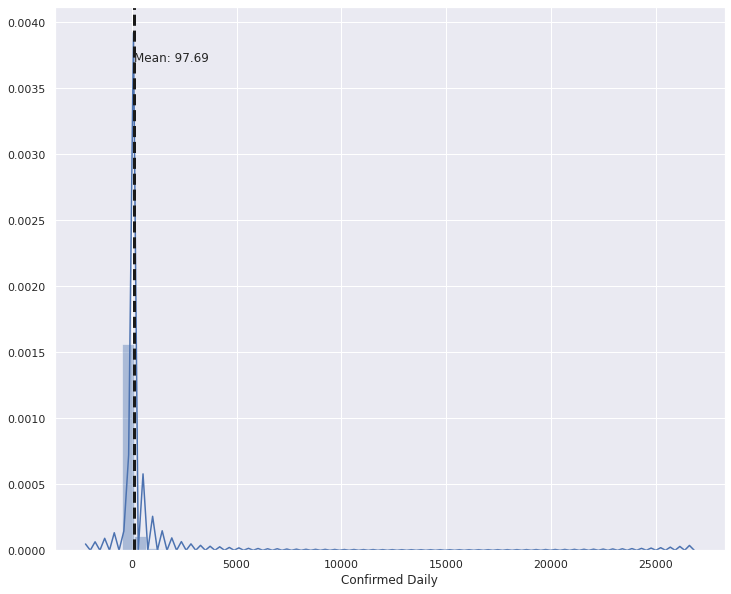

In [79]:
plot_distribution(data_confirm_daily)

/home/musab/.local/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

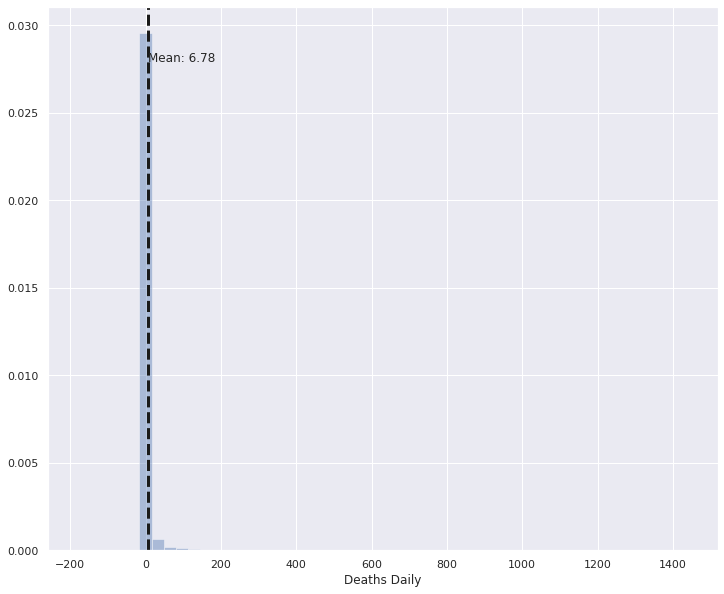

In [80]:
plot_distribution(data_death_daily)

/home/musab/.local/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


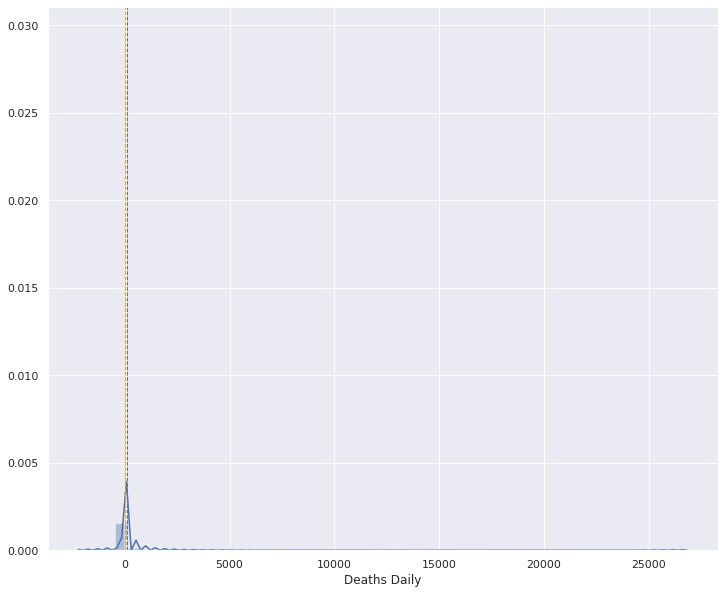

In [81]:


plt.figure()
ax1 = sns.distplot(data_confirm_daily)
ax2 = sns.distplot(data_death_daily)
plt.axvline(np.mean(data_confirm_daily), color='b', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(data_death_daily), color='orange', linestyle='dashed', linewidth=1)



In [84]:
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

In [85]:
sample_size = len(data_confirm_daily[20:1000])
#sample_size = sample_size[200]
compare_2_groups(data_confirm_daily, data_death_daily, 0.05, sample_size)
# Ttest is best use to compare the mean of 2 groups

Statistics=28.273, p=0.000
Different distributions (reject H0)


# --Anova Test--

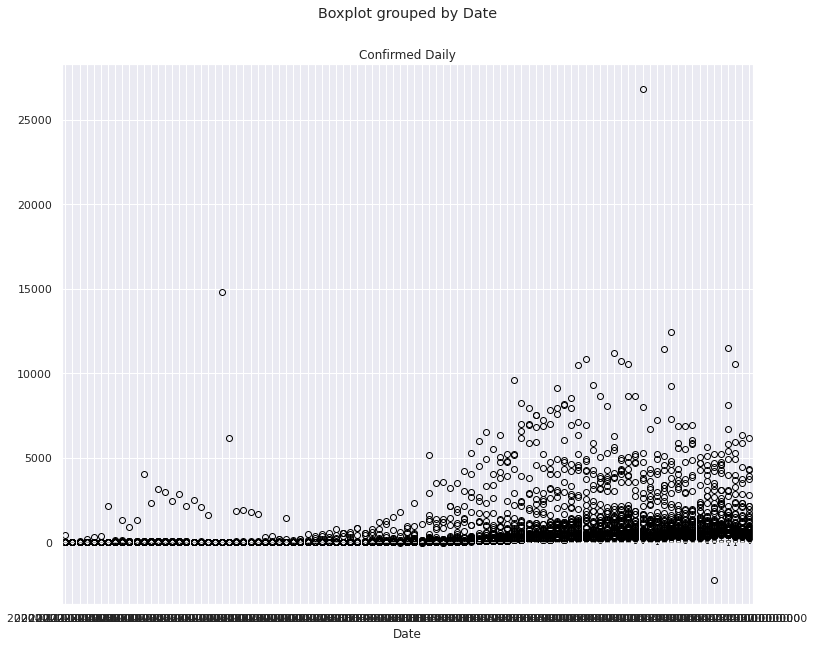

In [25]:
data_test.boxplot('Confirmed Daily',by='Date')

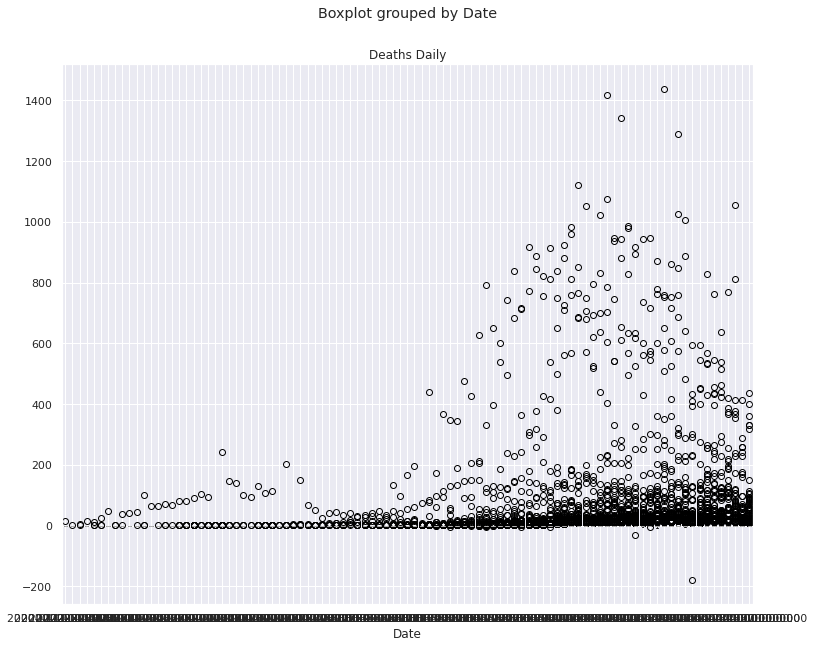

In [26]:
data_test.boxplot('Deaths Daily',by='Date')

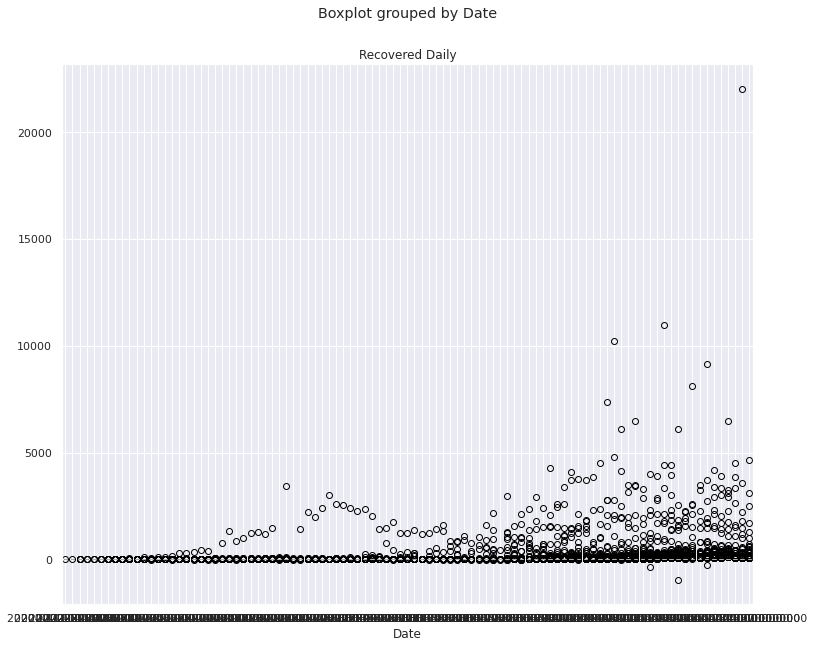

In [86]:
data_test.boxplot('Recovered Daily',by='Date')

In [87]:
fvalue, pvalue = stats.f_oneway(data_test['Confirmed Daily'],data_test['Deaths Daily'])
print('P-Value is: ',pvalue)
print('F-Value is: ',fvalue)
#The P value is the probability of getting a result at least as extreme as the one that was actually observed.


P-Value is:  9.548009948234472e-175
F-Value is:  799.353946596169


In [88]:
# Anova test is best use for more than 2 groups
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(data_test.reset_index(), id_vars=['index'], value_vars=['Confirmed Daily', 'Deaths Daily'])
# replace column names
d_melt.columns = ['index', 'treatments', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print('\n')
# Residuals (experimental error) are normally distributed (Shapiro Wilks Test)

from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['treatments'], alpha=0.05)
print(m_comp)

                     sum_sq       df           F         PR(>F)
C(treatments)  1.286617e+08      1.0  799.353947  9.548010e-175
Residual       1.002312e+10  62272.0         NaN            NaN


       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
     group1        group2    meandiff p-adj lower   upper   reject
------------------------------------------------------------------
Confirmed Daily Deaths Daily -90.9078 0.001 -97.21 -84.6057   True
------------------------------------------------------------------


In [85]:
#How ANOVA works?

#Check sample sizes: equal number of observation in each group
#Calculate Mean Square for each group (MS) (SS of group/level-1); level-1 is a degree of freedom (df) for a group
#Calculate Mean Square error (MSE) (SS error/df of residuals)
#Calculate F-value (MS of group/MSE)

In [89]:
peak_estimation = pd.read_csv('Final_dataview_report.csv')
peak_estimation

,Unnamed: 0,Province/State,Starting Date (c>30),Starting Date ID (c>30),Peak Date,Peak Date ID,Days until peak for Hubei,Days until Peak for this State/Country,Est Date for Peak,Est Date ID for Peak,Est Finish Date Based on current Peak,Est Finish Date ID Based on current Peak,Est Finish Date Based in Est Peak,Est Finish Date ID Based in Est Peak,Peak in Range with Hebei Peak (+- 7 days),Current Peak for 7 days+
0,0,Guangdong,22/01/2020,22,01/02/2020,32,43,10,05/03/2020,65,24/03/2020,84,26/04/2020,117,No,Yes
1,1,Hubei,22/01/2020,22,13/02/2020,44,43,22,05/03/2020,65,05/04/2020,96,26/04/2020,117,No,Yes
2,2,Beijing,22/01/2020,22,01/02/2020,32,43,10,05/03/2020,65,24/03/2020,84,26/04/2020,117,No,Yes
3,3,Zhejiang,22/01/2020,22,30/01/2020,30,43,8,05/03/2020,65,22/03/2020,82,26/04/2020,117,No,Yes
4,4,Chongqing,23/01/2020,23,02/02/2020,33,43,10,06/03/2020,66,25/03/2020,85,27/04/2020,118,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,270,Angola,17/04/2020,108,18/04/2020,109,43,1,30/05/2020,151,09/06/2020,161,21/07/2020,203,No,Yes
271,271,Eswatini,17/04/2020,108,25/04/2020,116,43,8,30/05/2020,151,16/06/2020,168,21/07/2020,203,No,No
272,272,Timor-Leste,15/04/2020,106,16/04/2020,107,43,1,28/05/2020,149,07/06/2020,159,19/07/2020,201,No,Yes
273,273,Botswana,08/04/2020,99,09/04/2020,100,43,1,21/05/2020,142,31/05/2020,152,12/07/2020,194,No,Yes


In [94]:
# Anova test is best use for more than 2 groups
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(peak_estimation.reset_index(), id_vars=['index'], value_vars=['Peak Date ID','Est Date ID for Peak'])
# replace column names
d_melt.columns = ['index', 'treatments', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print('\n')
# Residuals (experimental error) are normally distributed (Shapiro Wilks Test)


from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['treatments'], alpha=0.05)
print(m_comp)

                      sum_sq     df           F        PR(>F)
C(treatments)   45509.107273    1.0  102.279675  3.683817e-22
Residual       243831.345455  548.0         NaN           NaN


           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
       group1           group2    meandiff p-adj  lower    upper   reject
-------------------------------------------------------------------------
Est Date ID for Peak Peak Date ID -18.1927 0.001 -21.7263 -14.6592   True
-------------------------------------------------------------------------
